# Decision Trees

### Dispersion Graph: Age and Colesterol

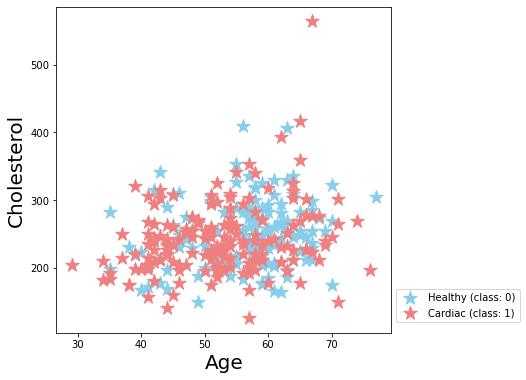

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as log

patients = pd.read_csv('pacientes.txt')
patients.head()

healthy = patients[patients['problema_cardiaco']==0]
cardiac = patients[patients['problema_cardiaco']==1]

plt.figure(figsize=(6,6))
plt.scatter(healthy['edad'], healthy['colesterol'],
            label='Healthy (class: 0)', marker='*', c='skyblue', s=200)
plt.scatter(cardiac['edad'], cardiac['colesterol'],
            label='Cardiac (class: 1)', marker='*', c='lightcoral', s=200)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Cholesterol', fontsize=20)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()



Note: The data cannot be separable (liealmente separable), in this case, it is appropiate to use decision trees.

# Entropy (Entropia)
### Promedio de información almacenada en una variable aleatoria

In [33]:
from scipy.stats import entropy
from math import log

ages = pd.Series([40,30,20,50])
cholesterol = pd.Series([100,110,100,110])

print(ages.value_counts()/ages.size)
print(cholesterol.value_counts()/cholesterol.size)
print(entropy(ages.value_counts()/ages.size, base=2))
print(entropy(cholesterol.value_counts()/cholesterol.size, base=2))




40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    0.5
110    0.5
dtype: float64
2.0
1.0


### Data to training and test

In [50]:
from sklearn.model_selection import train_test_split
data_training, data_test, class_training, class_test =  train_test_split(patients[['edad', 'colesterol']], 
                                                                         patients['problema_cardiaco'], 
                                                                         test_size=0.30)



### Creating the decision tree

0.6555555555555556
|--- Edad <= 53.50
|   |--- colesterol <= 227.50
|   |   |--- class: 1
|   |--- colesterol >  227.50
|   |   |--- class: 1
|--- Edad >  53.50
|   |--- colesterol <= 177.00
|   |   |--- class: 0
|   |--- colesterol >  177.00
|   |   |--- class: 0



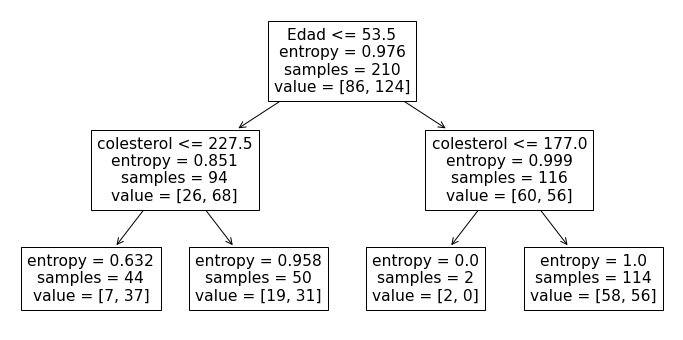

In [58]:
from sklearn import tree

decision_my_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2) # max_depth = profundidad o tantas ramas deseamos

# With data to training
my_tree = decision_my_tree.fit(data_training, class_training) # to graph o see text

# Test
accuracy = decision_my_tree.score(data_test, class_test)

print(accuracy)

print(tree.export_text(my_tree, feature_names=['Edad', 'colesterol']))

plt.figure(figsize=(12,6))
tree.plot_tree(my_tree, feature_names=['Edad', 'colesterol'])

plt.show()



### To evaluate new patient

In [59]:
print('New patient', decision_my_tree.predict([[70,150]]))

New patient [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


note: If we set-up the max_depth=2 to 4 or we eliminate the max_depth the tree increase a lot. This is a warning: the decision trees have the tendency to increase fast.